In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/OnlineNewsPopularity.csv')

In [4]:
target = df[' shares']
target.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

5581.0 10800.0


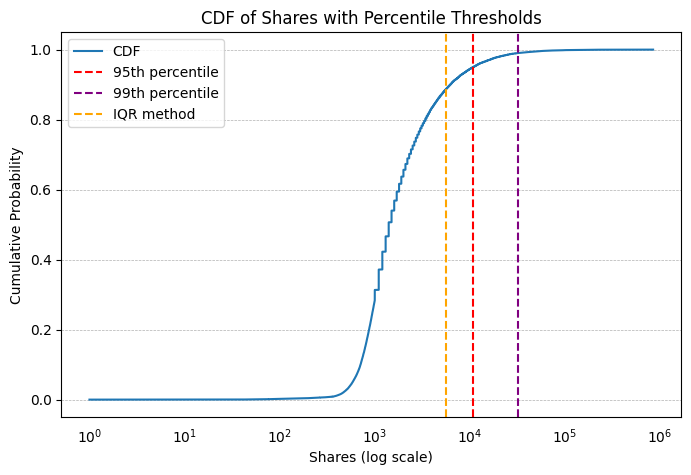

In [5]:
x = np.sort(target)
y = np.arange(1, len(x)+1) / len(x)

threshold_95 = target.quantile(0.95)
threshold_99 = target.quantile(0.99)
threshold_outlier = target.quantile(0.75) + 1.5*(target.quantile(0.75) - target.quantile(0.25))
print(threshold_outlier, threshold_95)

plt.figure(figsize=(8,5))
plt.plot(x, y, label='CDF')
plt.axvline(threshold_95, color='red', linestyle='--', label='95th percentile')
plt.axvline(threshold_99, color='purple', linestyle='--', label='99th percentile')
plt.axvline(threshold_outlier, color='orange', linestyle='--', label='IQR method')


plt.xscale('log')
plt.xlabel('Shares (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Shares with Percentile Thresholds')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.legend()
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

One could ponder at what percentile the author's 1400 threshold sits.

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [10]:
df[' timedelta'].describe()

count    10000.000000
mean       355.864400
std        212.989015
min          8.000000
25%        164.000000
50%        344.500000
75%        541.000000
max        731.000000
Name:  timedelta, dtype: float64

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

df = df.sample(10000)
X = df.drop(columns=['url', ' timedelta', ' shares'])
y = df[' shares']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# t-SNE to 2D
X_2D = TSNE(n_components=2, perplexity=30).fit_transform(X_scaled)

# Define outlier thresholds
low_thresh = y.quantile(0.05)
high_thresh = y.quantile(0.95)

# Masks
low = y <= low_thresh      # bottom 5%
high = y >= high_thresh    # top 5%
mid = (y > low_thresh) & (y < high_thresh)  # middle 90%

plt.figure(figsize=(8,6))

# Middle 90% — white with black border
plt.scatter(
    X_2D[mid, 0], X_2D[mid, 1],
    facecolors='white',
    edgecolors='black',
    linewidths=0.5,
    s=30,
    label='Middle 90%'
)

# Bottom 5% — red
plt.scatter(
    X_2D[low, 0], X_2D[low, 1],
    color='red',
    s=30,
    label='Bottom 5%'
)

# Top 5% — green
plt.scatter(
    X_2D[high, 0], X_2D[high, 1],
    color='green',
    s=30,
    label='Top 5%'
)

plt.title('t-SNE of Features with Share-Based Outliers Highlighted')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


KeyboardInterrupt: 